## Taller 2 

## Nombre: Moreno Cristina 
##  Fecha: 29/10/2025


---------------------------------------------------------------------------------------------------

**1) Encontrar las raices del polinomio $x^4+540x^3+109124x^2+9781632x+328188672$**

Primero graficamos para tener una idea de la función

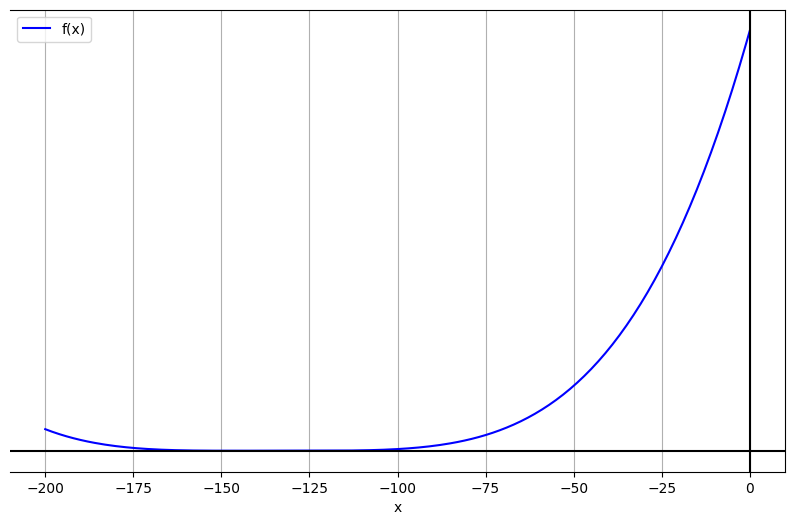

In [17]:
import matplotlib.pyplot as plt


def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672


x_vals = [x for x in range(-200, 1)]
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color='blue', label='f(x)')

plt.axhline(0, color='black')  
plt.axvline(0, color='black')


plt.yticks([])

ax = plt.gca() 
ax.spines['left'].set_visible(False)

plt.xlabel('x')
plt.grid(True)
plt.legend()

plt.show()





**Encontrar Las Raices con el Método de Newton**

In [18]:

from scipy import optimize

puntos = [200, -190, -180, -160, -150, -140, -130, -120, -110, -100, -90]

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672


def fprime(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

raizCop = []


for punto in puntos:
    raiz = optimize.newton(f, x0=punto, fprime=fprime)
    if round(raiz) not in raizCop:
        raizCop.append(round(raiz))

print("Raices a las que va a converger")
for r in raizCop:
    print(f"Raíz encontrada: {r}")


Raices a las que va a converger
Raíz encontrada: -126
Raíz encontrada: -152
Raíz encontrada: -136


**Encontrar las raices con el metodo de biseccion**

In [19]:
from scipy.optimize import root_scalar

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

intervalos = [(-155,-150),(-140,-135),(-131,-126)]

raices = []
for a, b in intervalos:
    raiz = root_scalar(f, bracket=[a, b], method='bisect')
    if raiz.converged:
        raiz_val = round(raiz.root)
        if raiz_val not in raices:
            raices.append(raiz_val)

print("Raices encontrada")
for r in raices:
    print(f"Raíz encontrada: {r}")






Raices encontrada
Raíz encontrada: -152
Raíz encontrada: -136
Raíz encontrada: -126


**2) Encuentre todos los puntos en los que la curva  ${\frac{y}{2}}^2={\frac{x+3}{2}^2}$ interseca en el eje y=-2**

Primero graficamos para tener una idea de la función

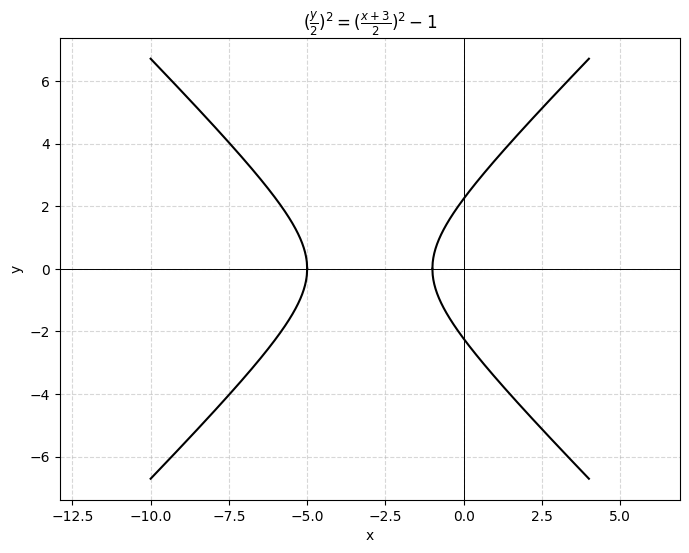

In [20]:
import matplotlib.pyplot as plt
import math


x_izq, y_izq_pos, y_izq_neg = [], [], []
x_der, y_der_pos, y_der_neg = [], [], []


x = -10
while x <= -5:
    val = ((x + 3) / 2) ** 2 - 1
    if val >= 0:
        y = 2 * math.sqrt(val)
        x_izq.append(x)
        y_izq_pos.append(y)
        y_izq_neg.append(-y)
    x += 0.01


x = -1
while x <= 4:
    val = ((x + 3) / 2) ** 2 - 1
    if val >= 0:
        y = 2 * math.sqrt(val)
        x_der.append(x)
        y_der_pos.append(y)
        y_der_neg.append(-y)
    x += 0.01


plt.figure(figsize=(8, 6))
plt.plot(x_izq, y_izq_pos, 'k')
plt.plot(x_izq, y_izq_neg, 'k')
plt.plot(x_der, y_der_pos, 'k')
plt.plot(x_der, y_der_neg, 'k')
plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.title(r"$(\frac{y}{2})^2 = (\frac{x+3}{2})^2 - 1$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')
plt.show()


Encontrar los puntos de interseccion con y=-2


Con el método de Newton

In [21]:
from scipy import optimize

puntos = [-10, 0]

def f(x):
    return ((x + 3)/2)**2 - 2

def fprime(x):
    return (x + 3)/2


raices = []

for x0 in puntos:
    raiz = optimize.newton(f, x0=x0, fprime=fprime)
    if round(raiz,6) not in raices:
        raices.append(round(raiz,6))

y = -2
print("Puntos de intersección con y=-2:")
for r in raices:
    print(f"({r}, {y})")


Puntos de intersección con y=-2:
(-5.828427, -2)
(-0.171573, -2)


Con el método de bisección

In [22]:
from scipy.optimize import root_scalar

def f(x):
    return ((x + 3)/2)**2 - 2

intervalos = [(-6, -4), (-1, 1)]

raices = []

for a, b in intervalos:
    res = root_scalar(f, bracket=[a, b], method='bisect')
    if res.converged:
        raiz_val = round(res.root, 6)
        if raiz_val not in raices:
            raices.append(raiz_val)

y = -2
print("Puntos de intersección con y=-2:")
for r in raices:
    print(f"({r}, {y})")


Puntos de intersección con y=-2:
(-5.828427, -2)
(-0.171573, -2)


3) Encontrar a partir de que valor se cumple que la funcion $f(x)=\frac{sin(x)}{x}$ 
cumpla con $$f(x)<0.015$$


$-1<f(x)<1$

$-1<sen(x)<1$

$\frac{-1}{x}<\frac{sen(x)}{x}<\frac{1}{x}$

$|\frac{sen(x)}{x}|<\frac{1}{x}$


$-0.015<\frac{sin(x)}{x}<0.015$

$sin(x)/x-0.015=0$

$sin(x)/x+0.015=0$

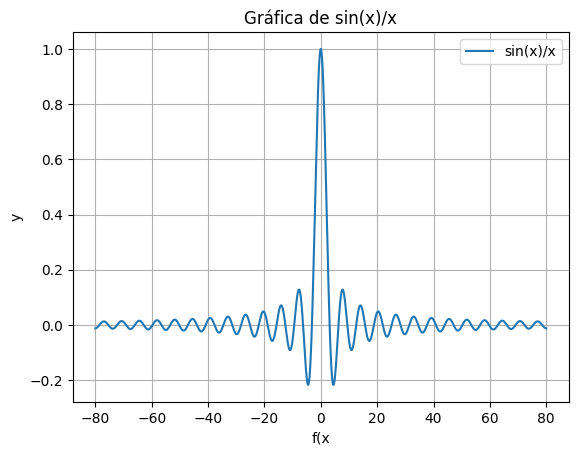

In [23]:
import math
import matplotlib.pyplot as plt

x = [i * 0.1 for i in range(-800, 801)] 

y = []
for xi in x:
    if xi == 0:
        y.append(1)
    else:
        y.append(math.sin(xi) / xi)

# Graficar
plt.plot(x, y, label='sin(x)/x')
plt.title('Gráfica de sin(x)/x')
plt.xlabel('f(x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()



Con el método de Newton


In [24]:
from scipy.optimize import newton
import math

def f(x):
    return math.sin(x)/x - 0.015

def fprime(x):
    return (x*math.cos(x) - math.sin(x)) / x**2

x0 = 67

xT = newton(f, x0=x0, fprime=fprime, tol=1e-12, maxiter=100)

print(xT)


64.12566704798954


**GIFS**

Newton Ejercicio 1

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import imageio
import os


def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def fprime(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

puntos = [200, -190, -180, -160, -150, -140, -130, -120, -110, -100, -90]

if not os.path.exists("frames_newton"):
    os.makedirs("frames_newton")

x_vals = np.linspace(-200, 0, 400)
y_vals = f(x_vals)

x_current = np.array(puntos, dtype=float)
converged = [False]*len(puntos)
tolerance = 1e-6
frame_num = 0


while not all(converged):
    plt.figure(figsize=(10,6))
    plt.plot(x_vals, y_vals, label='f(x)', color='blue')
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f"Método de Newton-Raphson - Iteración {frame_num}")
    plt.grid(True)
    
    for i, x in enumerate(x_current):
        if not converged[i]:
            x_next = x - f(x)/fprime(x)
        
            m = fprime(x)
            b = f(x) - m*x
            tang_x = np.linspace(x-10, x+10, 50)
            tang_y = m*tang_x + b
            plt.plot(tang_x, tang_y, '--', color='orange', alpha=0.5)
        
            plt.scatter(x, f(x), color='red', label=f"x{i}" if frame_num==0 else "")
            plt.scatter(x_next, 0, color='green', zorder=5)
        
            if abs(x_next - x) < tolerance:
                converged[i] = True
            x_current[i] = x_next
        else:
            
            plt.scatter(x_current[i], 0, color='green', zorder=5)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.savefig(f"frames_newton/frame_{frame_num:03d}.png")
    plt.close()
    frame_num += 1

frames = []
for f_name in sorted(os.listdir("frames_newton")):
    if f_name.endswith(".png"):
        frames.append(imageio.imread(os.path.join("frames_newton", f_name)))

imageio.mimsave("newton1.gif", frames, fps=2)
print("GIF generado: newton_todos_puntos.gif")




C:\Users\emore\AppData\Local\Temp\ipykernel_8868\3459865162.py:66: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(os.path.join("frames_newton", f_name)))


GIF generado: newton_todos_puntos.gif


El GIF ejercicio1 con el metodo de Biseccion

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import imageio
import os

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672


intervalos = [(-155,-150), (-140,-135), (-131,-126)]


x_vals = np.linspace(-200, 0, 400)
y_vals = f(x_vals)

if not os.path.exists("frames_bis"):
    os.makedirs("frames_bis")

frame_num = 0

def plot_biseccion(a, b, c, iteration, raiz_id):
    global frame_num
    plt.figure(figsize=(10,6))
    plt.plot(x_vals, y_vals, label='f(x)', color='blue')
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f"Método de Bisección (Raíz #{raiz_id+1}) - Iteración {iteration}")
    plt.grid(True)

    # Extremos del intervalo
    plt.scatter(a, f(a), color='red', label=f"a = {a:.4f}")
    plt.scatter(b, f(b), color='red', label=f"b = {b:.4f}")


    plt.scatter(c, f(c), color='green', label=f"c = {c:.4f}")

    plt.plot([a, b], [f(a), f(b)], color='orange', linestyle='--', label='Intervalo actual')

    plt.legend()
    plt.savefig(f"frames_bis/frame_{frame_num:03d}.png")
    plt.close()
    frame_num += 1

for idx, (a, b) in enumerate(intervalos):
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        print(f"No hay cambio de signo en el intervalo {a}, {b}")
        continue

    iteration = 0
    while abs(b - a) > 1e-6:
        c = (a + b) / 2
        fc = f(c)
        plot_biseccion(a, b, c, iteration, idx)

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        iteration += 1


frames = []
for i in sorted(os.listdir("frames_bis")):
    if i.endswith(".png"):
        frames.append(imageio.imread(os.path.join("frames_bis", i)))

imageio.mimsave("biseccion_animacion1.gif", frames, fps=2)
print("GIF generado: biseccion_animacion.gif")




C:\Users\emore\AppData\Local\Temp\ipykernel_8868\794108371.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(os.path.join("frames_bis", i)))


GIF generado: biseccion_animacion.gif


GIF ejericicio 2 Newton

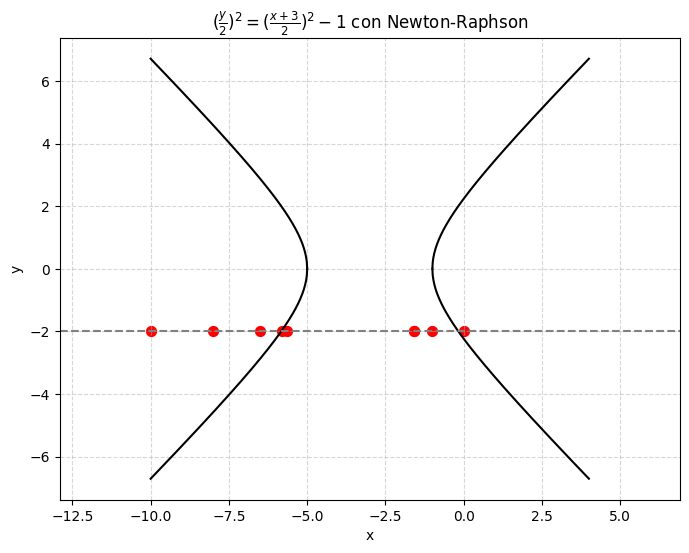

In [27]:
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

x_izq, y_izq_pos, y_izq_neg = [], [], []
x_der, y_der_pos, y_der_neg = [], [], []

x = -10
while x <= -5:
    val = ((x + 3) / 2) ** 2 - 1
    if val >= 0:
        y = 2 * math.sqrt(val)
        x_izq.append(x)
        y_izq_pos.append(y)
        y_izq_neg.append(-y)
    x += 0.01

x = -1
while x <= 4:
    val = ((x + 3) / 2) ** 2 - 1
    if val >= 0:
        y = 2 * math.sqrt(val)
        x_der.append(x)
        y_der_pos.append(y)
        y_der_neg.append(-y)
    x += 0.01

valores_raiz1 = [-10, -8, -6.5, -5.8, -5.64575131]
valores_raiz2 = [0, -1, -1.585786, -1.585786]
valores_totales = valores_raiz2 + valores_raiz1

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_izq, y_izq_pos, 'k')
ax.plot(x_izq, y_izq_neg, 'k')
ax.plot(x_der, y_der_pos, 'k')
ax.plot(x_der, y_der_neg, 'k')
ax.axhline(-2, color='gray', linestyle='--', label='y = -2')
ax.set_title(r"$(\frac{y}{2})^2 = (\frac{x+3}{2})^2 - 1$ con Newton-Raphson")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, linestyle='--', alpha=0.5)
ax.axis('equal')

scatter = ax.scatter([], [], color='red', s=50)

def animate(i):
    xs = valores_totales[:i+1]
    ys = [-2]*len(xs) 
    scatter.set_offsets(np.c_[xs, ys])
    return scatter,

ani = FuncAnimation(fig, animate, frames=len(valores_totales), interval=800, repeat_delay=1000)

ani.save('newton2.gif', writer=PillowWriter(fps=1))
plt.show()


GIF ejercicio 2 Biseccion 

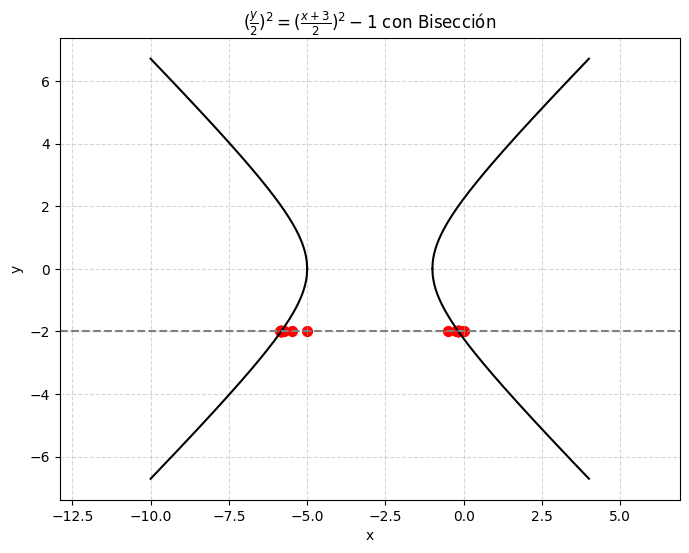

In [28]:
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.optimize import root_scalar


x_izq, y_izq_pos, y_izq_neg = [], [], []
x_der, y_der_pos, y_der_neg = [], [], []

x = -10
while x <= -5:
    val = ((x + 3) / 2) ** 2 - 1
    if val >= 0:
        y = 2 * math.sqrt(val)
        x_izq.append(x)
        y_izq_pos.append(y)
        y_izq_neg.append(-y)
    x += 0.01

x = -1
while x <= 4:
    val = ((x + 3) / 2) ** 2 - 1
    if val >= 0:
        y = 2 * math.sqrt(val)
        x_der.append(x)
        y_der_pos.append(y)
        y_der_neg.append(-y)
    x += 0.01


def f(x):
    return ((x + 3)/2)**2 - 2

intervalos = [(-6, -4), (-1, 1)]
puntos_biseccion = []

for a, b in intervalos:
    left, right = a, b
    tol = 1e-6
    while right - left > tol:
        mid = (left + right)/2
        puntos_biseccion.append(mid)  
        if f(left) * f(mid) <= 0:
            right = mid
        else:
            left = mid


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_izq, y_izq_pos, 'k')
ax.plot(x_izq, y_izq_neg, 'k')
ax.plot(x_der, y_der_pos, 'k')
ax.plot(x_der, y_der_neg, 'k')
ax.axhline(-2, color='gray', linestyle='--', label='y = -2')
ax.set_title(r"$(\frac{y}{2})^2 = (\frac{x+3}{2})^2 - 1$ con Bisección")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, linestyle='--', alpha=0.5)
ax.axis('equal')


scatter = ax.scatter([], [], color='red', s=50)

def animate(i):
    xs = puntos_biseccion[:i+1]
    ys = [-2]*len(xs)
    scatter.set_offsets(np.c_[xs, ys])
    return scatter,


ani = FuncAnimation(fig, animate, frames=len(puntos_biseccion), interval=300, repeat_delay=1000)


ani.save('biseccion2.gif', writer=PillowWriter(fps=4))
plt.show()
